# COVID-19 Drug Discovery Data Test

This notebook tests the download and loading of the COVID-19 Drug Discovery dataset from Kaggle.

In [1]:
# Install required packages
%pip install kagglehub pandas matplotlib seaborn numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shutil

# Download the dataset to current directory
print("Downloading COVID-19 Drug Discovery dataset...")
cache_path = kagglehub.dataset_download("divyansh22/drug-discovery-data")

# Copy to current folder
current_dir = os.getcwd()
local_data_dir = current_dir
os.makedirs(local_data_dir, exist_ok=True)

# Copy files from cache to local directory
for file in os.listdir(cache_path):
    src = os.path.join(cache_path, file)
    dst = os.path.join(local_data_dir, file)
    shutil.copy2(src, dst)
    print(f"Copied {file} to local data folder")

path = local_data_dir
print(f"Dataset available locally at: {path}")

/home/tamim/ai4ph/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Copied DDH Data.csv to local data folder
Copied DDH Data with Properties.csv to local data folder
Dataset available locally at: /home/tamim/ai4ph/data/covid19_drug_discovery


In [3]:
# List all files in the dataset
print("Files in dataset:")
files = os.listdir(path)
for file in files:
    file_path = os.path.join(path, file)
    if os.path.isfile(file_path):
        size = os.path.getsize(file_path) / 1024  # Size in KB
        print(f"- {file} ({size:.2f} KB)")

Files in dataset:
- README.md (0.96 KB)
- DDH Data.csv (7.31 KB)
- DDH Data with Properties.csv (47.35 KB)
- dataset_download.ipynb (108.56 KB)


In [4]:
# Load CSV files
csv_files = [f for f in files if f.endswith('.csv')]
print(f"Found {len(csv_files)} CSV files")

dataframes = {}
for csv_file in csv_files:
    print(f"\nLoading {csv_file}...")
    try:
        df = pd.read_csv(os.path.join(path, csv_file))
        dataframes[csv_file] = df
        print(f"✅ Loaded successfully: {df.shape}")
        print(f"Columns: {list(df.columns)}")
        if len(df) > 0:
            print(f"Sample data:\n{df.head(3)}\n")
    except Exception as e:
        print(f"❌ Error loading {csv_file}: {e}")

Found 2 CSV files

Loading DDH Data.csv...
✅ Loaded successfully: (104, 4)
Columns: ['Compound No.', 'SMILES', 'pIC50 (IC50 in microM)', 'Unnamed: 3']
Sample data:
   Compound No.                                             SMILES  \
0             1  ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...   
1             2  CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...   
2             3  CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...   

  pIC50 (IC50 in microM)  Unnamed: 3  
0           -0.477121255         NaN  
1                     -1         NaN  
2           -1.041392685         NaN  


Loading DDH Data with Properties.csv...
✅ Loaded successfully: (104, 40)
Columns: ['CID', 'SMILES', 'MolecularFormula', 'MolecularWeight', 'InChI', 'InChIKey', 'IUPACName', 'XLogP', 'ExactMass', 'MonoisotopicMass', 'TPSA', 'Complexity', 'Charge', 'HBondDonorCount', 'HBondAcceptorCount', 'RotatableBondCount', 'HeavyAtomCount', 'IsotopeAtomCount', 'AtomStereoCount', 'DefinedAtomStereoCount', 'Und

In [5]:
# Analyze drug discovery data
for filename, df in dataframes.items():
    print(f"\n{'='*50}")
    print(f"Analyzing {filename}")
    print(f"{'='*50}")
    
    print(f"Shape: {df.shape}")
    print(f"\nData types:")
    print(df.dtypes.value_counts())
    
    # Check for missing values
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"\nMissing values:")
        print(missing[missing > 0])
    else:
        print("\n✅ No missing values")
    
    # Statistical summary for numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(numeric_cols) > 0:
        print(f"\nStatistical summary for numeric columns:")
        print(df[numeric_cols].describe())
    
    # Show unique values for key columns that might contain molecular info
    potential_mol_cols = [col for col in df.columns if any(keyword in col.lower() 
                         for keyword in ['smiles', 'molecule', 'compound', 'drug', 'ic50', 'activity'])]
    
    for col in potential_mol_cols[:3]:  # Show first 3 relevant columns
        print(f"\n{col} (sample values):")
        if df[col].dtype == 'object':
            unique_count = df[col].nunique()
            print(f"Unique values: {unique_count}")
            print(f"Sample: {list(df[col].dropna().unique()[:5])}")
        else:
            print(f"Range: {df[col].min()} - {df[col].max()}")
            print(f"Mean: {df[col].mean():.4f}")


Analyzing DDH Data.csv
Shape: (104, 4)

Data types:
object     2
int64      1
float64    1
Name: count, dtype: int64

Missing values:
Unnamed: 3    104
dtype: int64

Statistical summary for numeric columns:
       Compound No.  Unnamed: 3
count    104.000000         0.0
mean      52.500000         NaN
std       30.166206         NaN
min        1.000000         NaN
25%       26.750000         NaN
50%       52.500000         NaN
75%       78.250000         NaN
max      104.000000         NaN

Compound No. (sample values):
Range: 1 - 104
Mean: 52.5000

SMILES (sample values):
Unique values: 104
Sample: ['ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=CC=C2)=CC(Cl)=C1', 'CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O)NC2=CC=C(Cl)C=C2)=N1', 'CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)NC2=CC=C(Cl)C=C2)=N1', 'CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)NC2=CC=CC=C2Cl)=N1', 'CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(Cl)C=C2)=NC=C1']

pIC50 (IC50 in microM) (sample values):
Unique value

Creating visualizations for DDH Data.csv


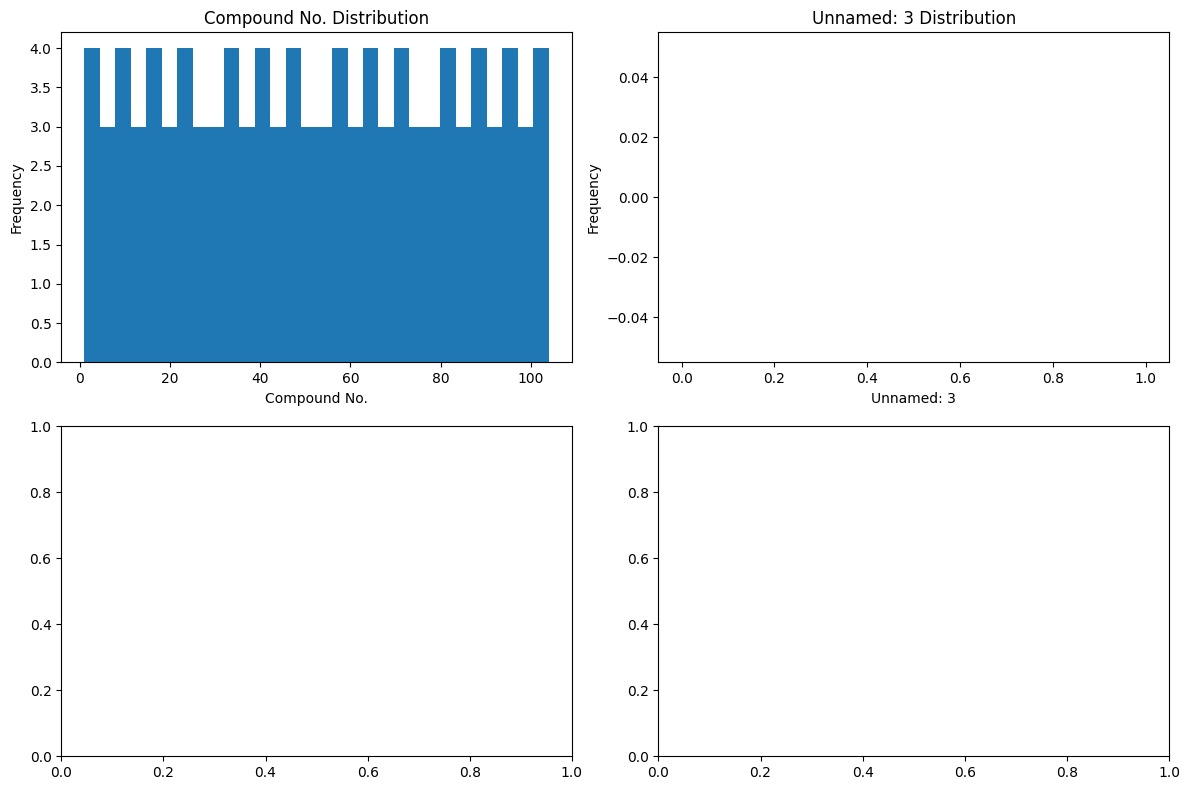

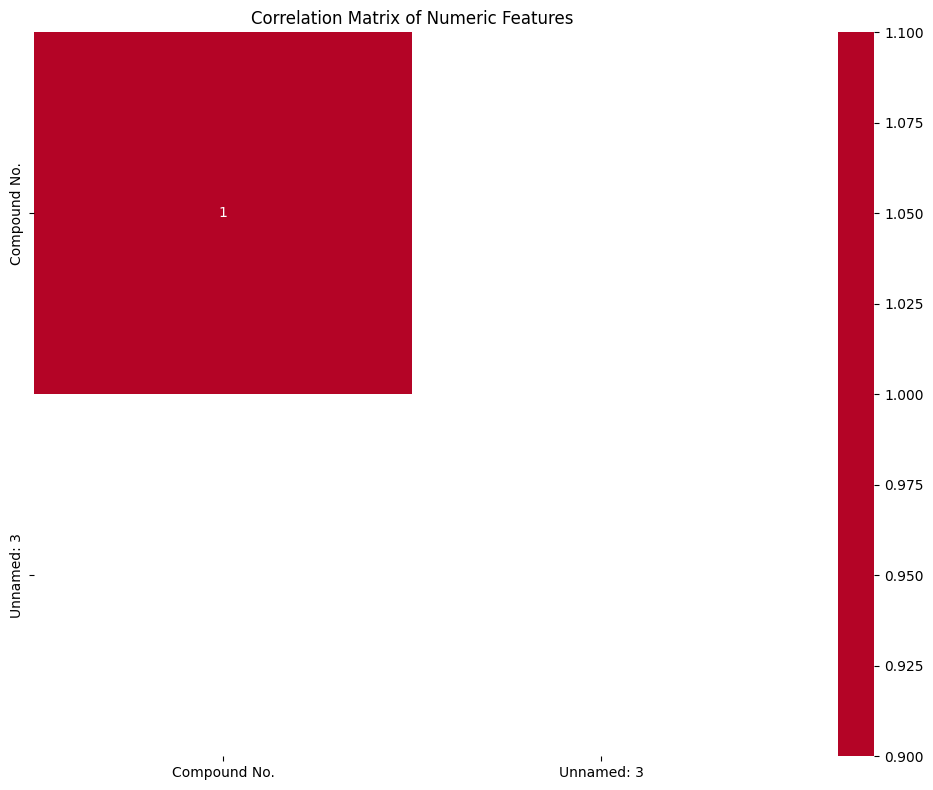

In [6]:
# Create visualizations
if dataframes:
    main_file = list(dataframes.keys())[0]
    df = dataframes[main_file]
    
    print(f"Creating visualizations for {main_file}")
    
    # Plot numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    if len(numeric_cols) > 0:
        n_plots = min(4, len(numeric_cols))
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        axes = axes.ravel()
        
        for i, col in enumerate(numeric_cols[:n_plots]):
            # Handle potential log scale for IC50 or similar activity data
            data = df[col].dropna()
            if 'ic50' in col.lower() and data.min() > 0:
                data = np.log10(data)
                axes[i].hist(data, bins=30)
                axes[i].set_title(f'Log10({col}) Distribution')
                axes[i].set_xlabel(f'Log10({col})')
            else:
                axes[i].hist(data, bins=30)
                axes[i].set_title(f'{col} Distribution')
                axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
        
        plt.tight_layout()
        plt.show()
    
    # Correlation matrix for numeric features
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10, 8))
        correlation_matrix = df[numeric_cols].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Matrix of Numeric Features')
        plt.tight_layout()
        plt.show()

In [7]:
# Look for SMILES strings or molecular data
if dataframes:
    for filename, df in dataframes.items():
        smiles_cols = [col for col in df.columns if 'smiles' in col.lower()]
        if smiles_cols:
            print(f"\nFound SMILES data in {filename}:")
            for col in smiles_cols:
                print(f"Column: {col}")
                sample_smiles = df[col].dropna().iloc[:3].tolist()
                print(f"Sample SMILES: {sample_smiles}")
                print(f"Total molecules: {df[col].nunique()}")


Found SMILES data in DDH Data.csv:
Column: SMILES
Sample SMILES: ['ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=CC=C2)=CC(Cl)=C1', 'CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O)NC2=CC=C(Cl)C=C2)=N1', 'CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)NC2=CC=C(Cl)C=C2)=N1']
Total molecules: 104

Found SMILES data in DDH Data with Properties.csv:
Column: SMILES
Sample SMILES: ['ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=CC=C2)=CC(Cl)=C1', 'CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O)NC2=CC=C(Cl)C=C2)=N1', 'CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)NC2=CC=C(Cl)C=C2)=N1']
Total molecules: 104


In [8]:
print("✅ Dataset download and analysis completed successfully!")
print("\nDataset Summary:")
print(f"- Location: {path}")
print(f"- Files: {len(files)}")
print(f"- CSV files: {len(csv_files)}")
if dataframes:
    total_rows = sum(df.shape[0] for df in dataframes.values())
    total_cols = sum(df.shape[1] for df in dataframes.values())
    print(f"- Total compounds/records: {total_rows:,}")
    print(f"- Total features: {total_cols}")
print("- Use case: Drug discovery, molecular property prediction, COVID-19 therapeutics")
print("- Perfect for: Computational chemistry, QSAR modeling, pharmaceutical research")

✅ Dataset download and analysis completed successfully!

Dataset Summary:
- Location: /home/tamim/ai4ph/data/covid19_drug_discovery
- Files: 4
- CSV files: 2
- Total compounds/records: 208
- Total features: 44
- Use case: Drug discovery, molecular property prediction, COVID-19 therapeutics
- Perfect for: Computational chemistry, QSAR modeling, pharmaceutical research
